## Radio Interferometry

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
plt.rcParams['figure.figsize']=[12,12]

In [230]:
data_folder = "/Users/shearert/Desktop/lsa-ast361/Work/shearert/lab7/radio-astronomy/"

gal_files = glob.glob(data_folder+"galaxyData/galpos*0.dat")
cal_files = glob.glob(data_folder+"galaxyData/calib*")
gal_files.sort()
cal_files.sort()

print(gal_files)

['/Users/shearert/Desktop/lsa-ast361/Work/shearert/lab7/radio-astronomy/galaxyData/galpos00.dat', '/Users/shearert/Desktop/lsa-ast361/Work/shearert/lab7/radio-astronomy/galaxyData/galpos10.dat', '/Users/shearert/Desktop/lsa-ast361/Work/shearert/lab7/radio-astronomy/galaxyData/galpos20.dat', '/Users/shearert/Desktop/lsa-ast361/Work/shearert/lab7/radio-astronomy/galaxyData/galpos30.dat', '/Users/shearert/Desktop/lsa-ast361/Work/shearert/lab7/radio-astronomy/galaxyData/galpos40.dat', '/Users/shearert/Desktop/lsa-ast361/Work/shearert/lab7/radio-astronomy/galaxyData/galpos50.dat', '/Users/shearert/Desktop/lsa-ast361/Work/shearert/lab7/radio-astronomy/galaxyData/galpos60.dat', '/Users/shearert/Desktop/lsa-ast361/Work/shearert/lab7/radio-astronomy/galaxyData/galpos70.dat', '/Users/shearert/Desktop/lsa-ast361/Work/shearert/lab7/radio-astronomy/galaxyData/galpos80.dat', '/Users/shearert/Desktop/lsa-ast361/Work/shearert/lab7/radio-astronomy/galaxyData/galpos90.dat']


In [231]:
gal_spectra = []

for gal_file in gal_files:
    
    with open(gal_file) as gal_data:
        
        spectrum_rows = []
        
        for j, row in enumerate(gal_data, start=1):
            if j%4 ==0:
                spectrum_rows.append(row)
                
        tot_spectrum = np.zeros(1024)
        for row in spectrum_rows:
            temp_spec = row.split(' ')
            spec = []
            for val in temp_spec:
                if val != '' and val != '\n':
                    spec.append(val)
                    
            tot_spectrum = (tot_spectrum + np.float64(spec))/len(spectrum_rows)
            
        gal_spectra.append(tot_spectrum)

In [232]:
print("The shape of the galaxy spectra points are: ",np.array(gal_spectra).shape)
frequency = np.linspace(1416,1426,1024)
print("Frequency points are: ")
print(frequency)

The shape of the galaxy spectra points are:  (10, 1024)
Frequency points are: 
[1416.         1416.00977517 1416.01955034 ... 1425.98044966 1425.99022483
 1426.        ]


Text(0.5, 1.0, 'All 10 frames of Galaxy Flux vs. Frequency')

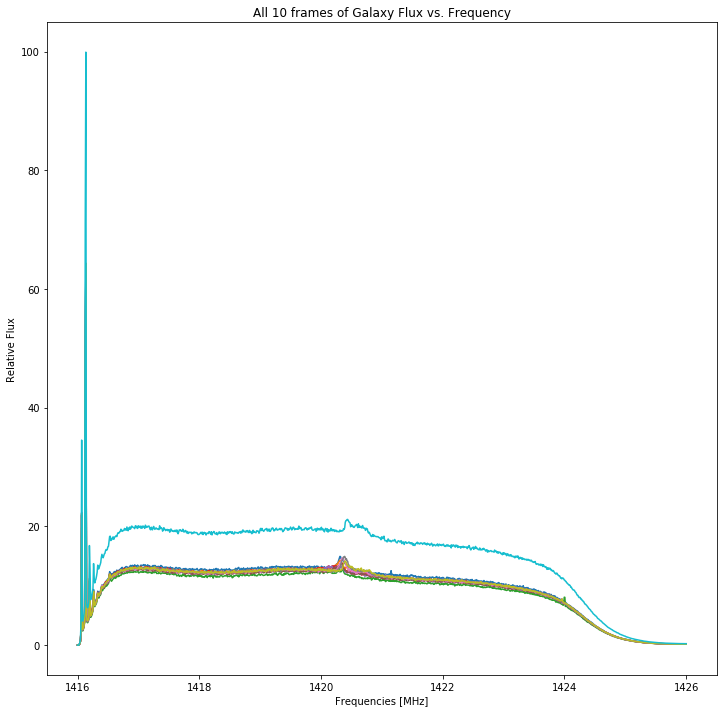

In [233]:
for i in range(0,len(gal_spectra)):
    plt.plot(frequency,gal_spectra[i])
plt.xlabel("Frequencies [MHz]")
plt.ylabel("Relative Flux")
plt.title("All 10 frames of Galaxy Flux vs. Frequency")

In [234]:
cal_spectra = []

for cal_file in cal_files:
    
    with open(cal_file) as cal_data:
        
        spectrum_rows2 = []
        
        for j, row2 in enumerate(cal_data, start=1):
            if j%4 ==0:
                spectrum_rows2.append(row)
                
        tot_spectrum2 = np.zeros(1024)
        for row2 in spectrum_rows2:
            temp_spec2 = row2.split(' ')
            spec2 = []
            for val2 in temp_spec2:
                if val2 != '' and val2 != '\n':
                    spec2.append(val2)
                    
            tot_spectrum2 = (tot_spectrum2 + np.float64(spec2))/len(spectrum_rows2)
            
        cal_spectra.append(tot_spectrum)

In [235]:
print("The shape of the galaxy spectra points are: ",np.array(cal_spectra).shape)
frequency = np.linspace(1416,1426,1024)
print("Frequency points are: ")
print(frequency)

The shape of the galaxy spectra points are:  (1, 1024)
Frequency points are: 
[1416.         1416.00977517 1416.01955034 ... 1425.98044966 1425.99022483
 1426.        ]


Text(0.5, 1.0, 'Frame of Galaxy Calibration Flux vs. Frequency')

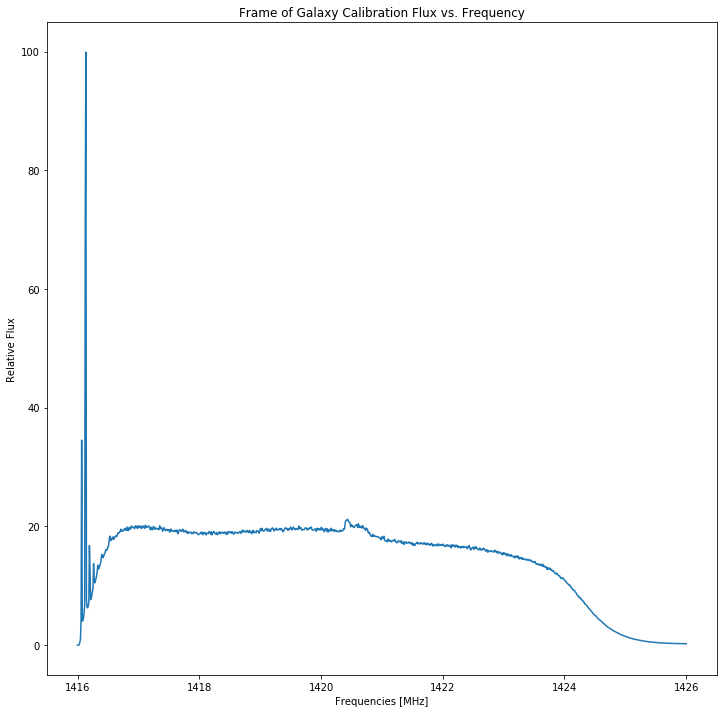

In [236]:
for i in range(0,len(cal_spectra)):
    plt.plot(frequency,cal_spectra[i])
plt.xlabel("Frequencies [MHz]")
plt.ylabel("Relative Flux")
plt.title("Frame of Galaxy Calibration Flux vs. Frequency")

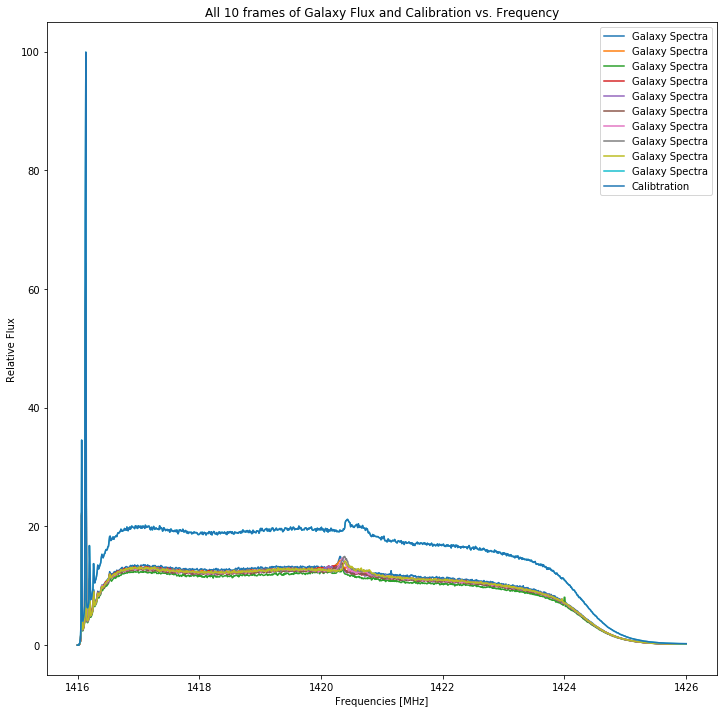

In [237]:
for i in range(0,len(gal_spectra)):
    plt.plot(frequency,gal_spectra[i],label="Galaxy Spectra")
plt.plot(frequency,cal_spectra[0],label="Calibtration")
plt.xlabel("Frequencies [MHz]")
plt.ylabel("Relative Flux")
plt.title("All 10 frames of Galaxy Flux and Calibration vs. Frequency")
plt.legend()

Text(0.5, 1.0, 'All 10 frames of Calibrated Galaxy Flux vs. Frequency')

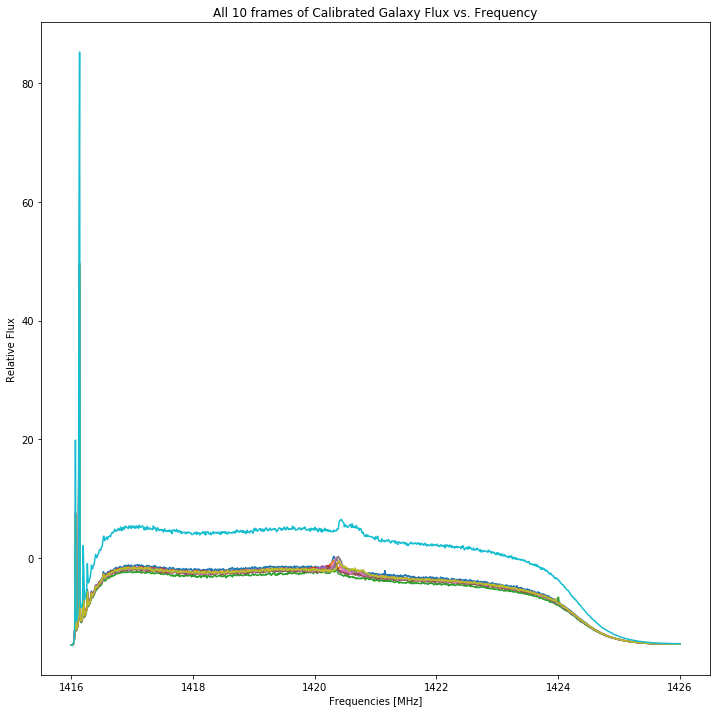

In [238]:
calmean = np.mean(cal_spectra)
calgalspectra = gal_spectra-calmean

for i in range(0,len(gal_spectra)):
    plt.plot(frequency,calgalspectra[i])
plt.xlabel("Frequencies [MHz]")
plt.ylabel("Relative Flux")
plt.title("All 10 frames of Calibrated Galaxy Flux vs. Frequency")

Text(0.5, 1.0, 'All 10 frames of Galaxy Flux vs. Frequency Zoomed')

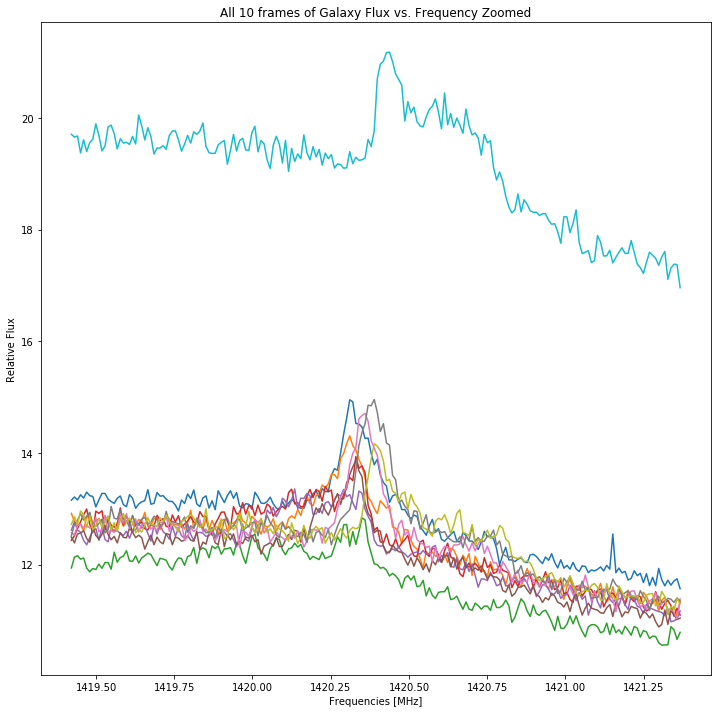

In [239]:
for i in range(0,len(gal_spectra)):
    plt.plot(frequency[350:550],gal_spectra[i][350:550])
plt.xlabel("Frequencies [MHz]")
plt.ylabel("Relative Flux")
plt.title("All 10 frames of Galaxy Flux vs. Frequency Zoomed")

Min zoomed Freq 1419.9100684261975 Max zoomed Freq 1420.887585532747


Text(0.5, 1.0, '0 Deg of Galaxy Flux vs. Frequency')

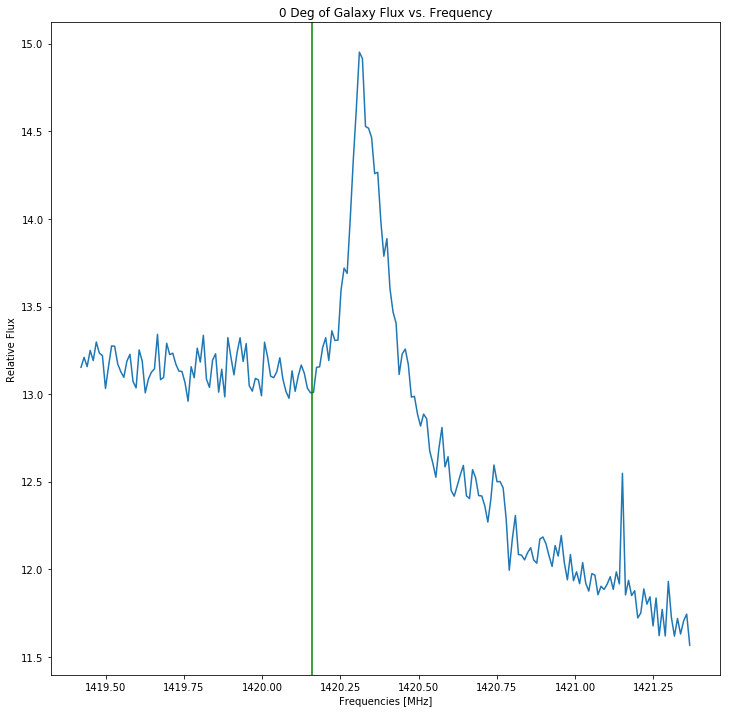

In [240]:
print("Min zoomed Freq",frequency[400],"Max zoomed Freq",frequency[500])
plt.plot(frequency[350:550],gal_spectra[0][350:550])
h100 = 1420.160
plt.axvline(h100,color='g')
plt.xlabel("Frequencies [MHz]")
plt.ylabel("Relative Flux")
plt.title("0 Deg of Galaxy Flux vs. Frequency")

Text(0.5, 1.0, '10 Deg of Galaxy Flux vs. Frequency')

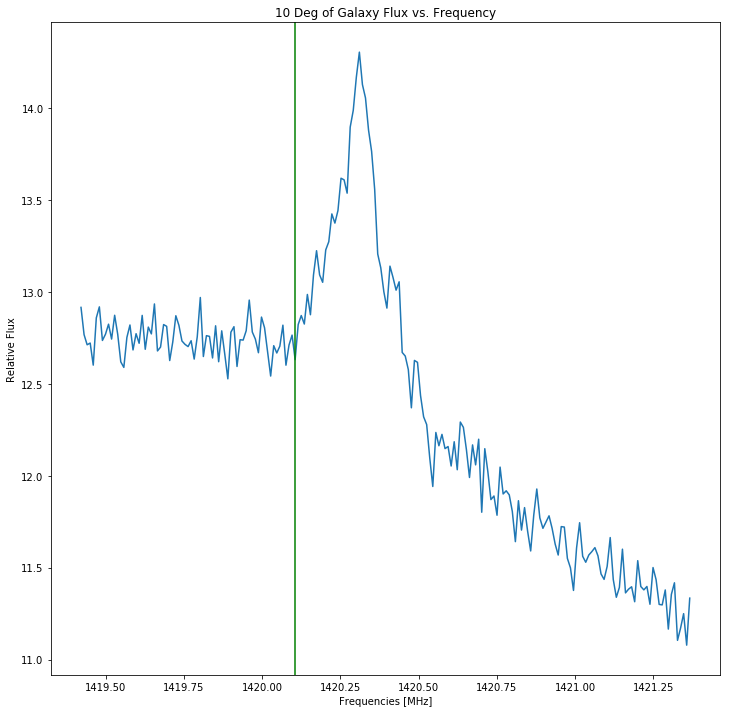

In [241]:
plt.plot(frequency[350:550],gal_spectra[1][350:550])
h110 = 1420.105
plt.axvline(h110,color='g')
plt.xlabel("Frequencies [MHz]")
plt.ylabel("Relative Flux")
plt.title("10 Deg of Galaxy Flux vs. Frequency")

Text(0.5, 1.0, '20 Deg of Galaxy Flux vs. Frequency')

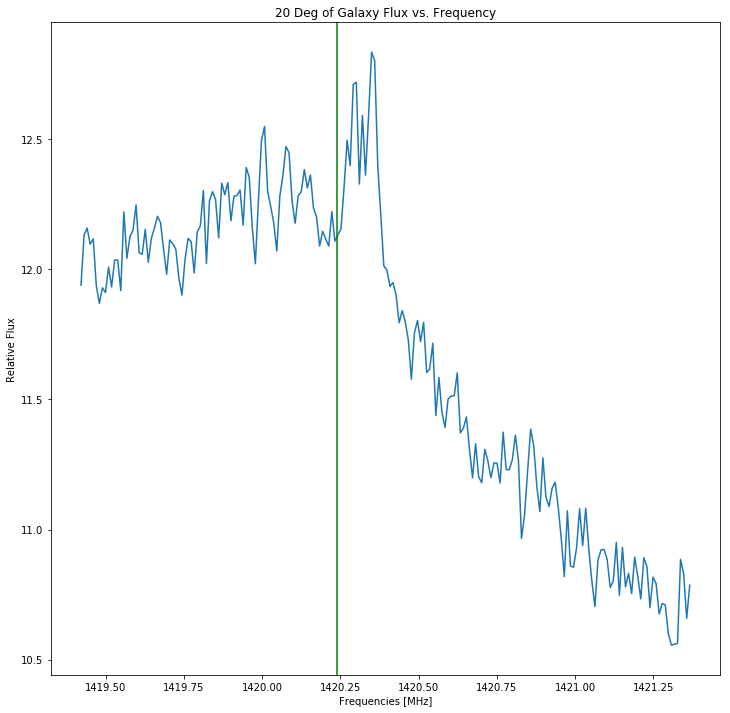

In [242]:
plt.plot(frequency[350:550],gal_spectra[2][350:550])
h120 = 1420.24
plt.axvline(h120,color='g')
plt.xlabel("Frequencies [MHz]")
plt.ylabel("Relative Flux")
plt.title("20 Deg of Galaxy Flux vs. Frequency")

Text(0.5, 1.0, '30 Deg of Galaxy Flux vs. Frequency')

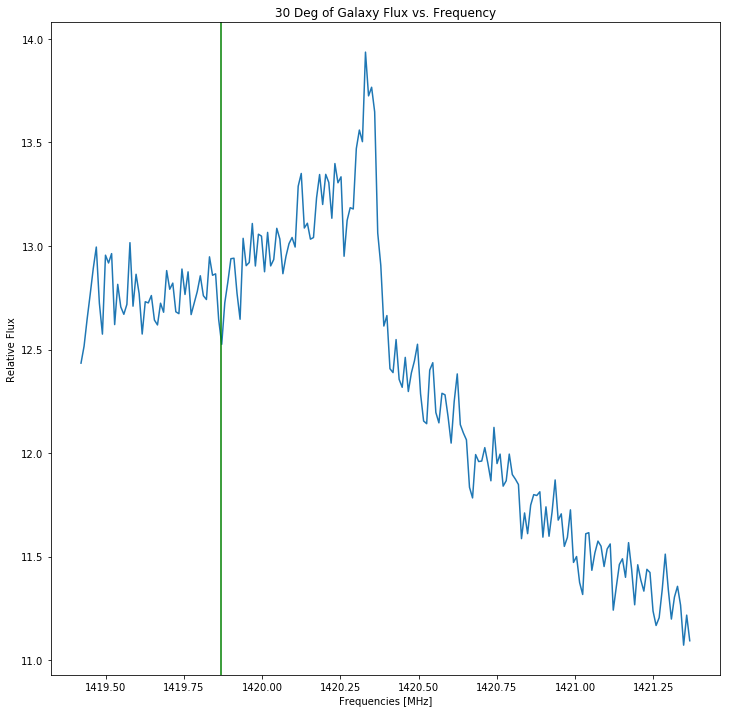

In [243]:
plt.plot(frequency[350:550],gal_spectra[3][350:550])
h130 = 1419.87
plt.axvline(h130,color='g')
plt.xlabel("Frequencies [MHz]")
plt.ylabel("Relative Flux")
plt.title("30 Deg of Galaxy Flux vs. Frequency")

Text(0.5, 1.0, '40 Deg of Galaxy Flux vs. Frequency')

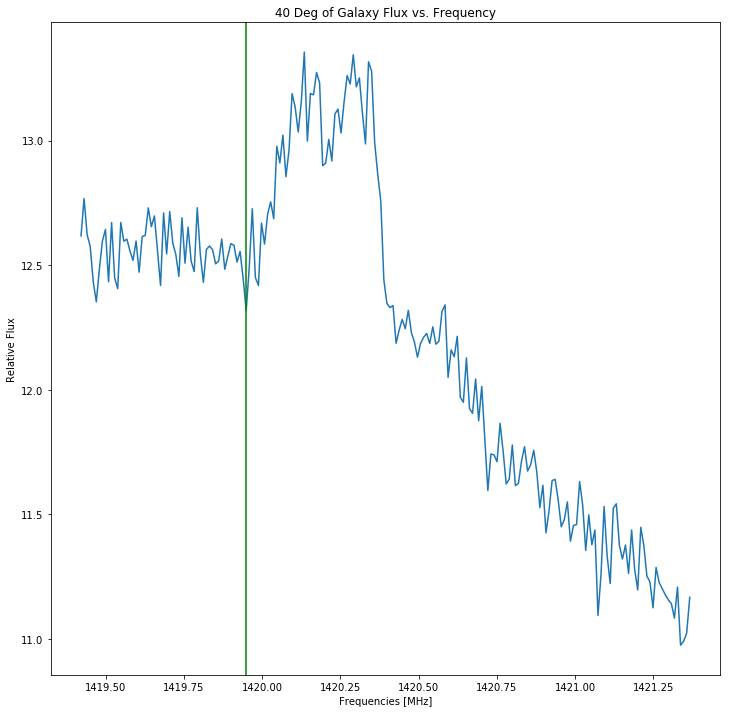

In [244]:
plt.plot(frequency[350:550],gal_spectra[4][350:550])
h140 = 1419.95
plt.axvline(h140,color='g')
plt.xlabel("Frequencies [MHz]")
plt.ylabel("Relative Flux")
plt.title("40 Deg of Galaxy Flux vs. Frequency")

Text(0.5, 1.0, '50 Deg of Galaxy Flux vs. Frequency')

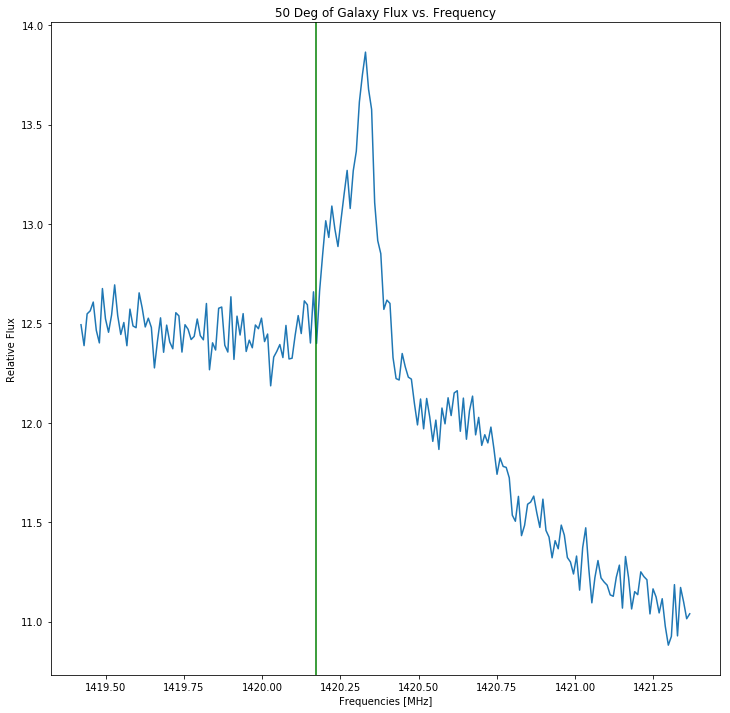

In [245]:
plt.plot(frequency[350:550],gal_spectra[5][350:550])
h150 = 1420.173
plt.axvline(h150,color='g')
plt.xlabel("Frequencies [MHz]")
plt.ylabel("Relative Flux")
plt.title("50 Deg of Galaxy Flux vs. Frequency")

Text(0.5, 1.0, '60 Deg of Galaxy Flux vs. Frequency')

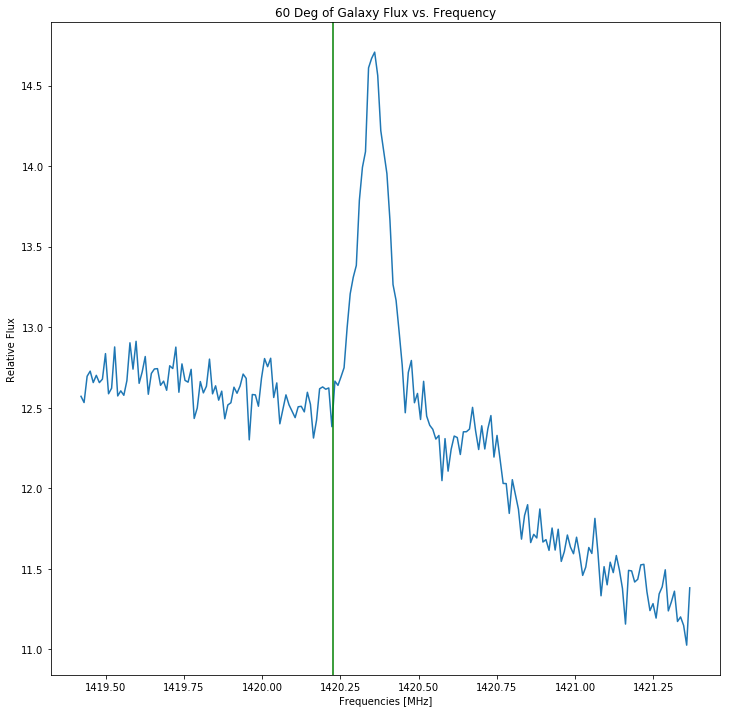

In [246]:
plt.plot(frequency[350:550],gal_spectra[6][350:550])
h160 = 1420.225
plt.axvline(h160,color='g')
plt.xlabel("Frequencies [MHz]")
plt.ylabel("Relative Flux")
plt.title("60 Deg of Galaxy Flux vs. Frequency")

Text(0.5, 1.0, '70 Deg of Galaxy Flux vs. Frequency')

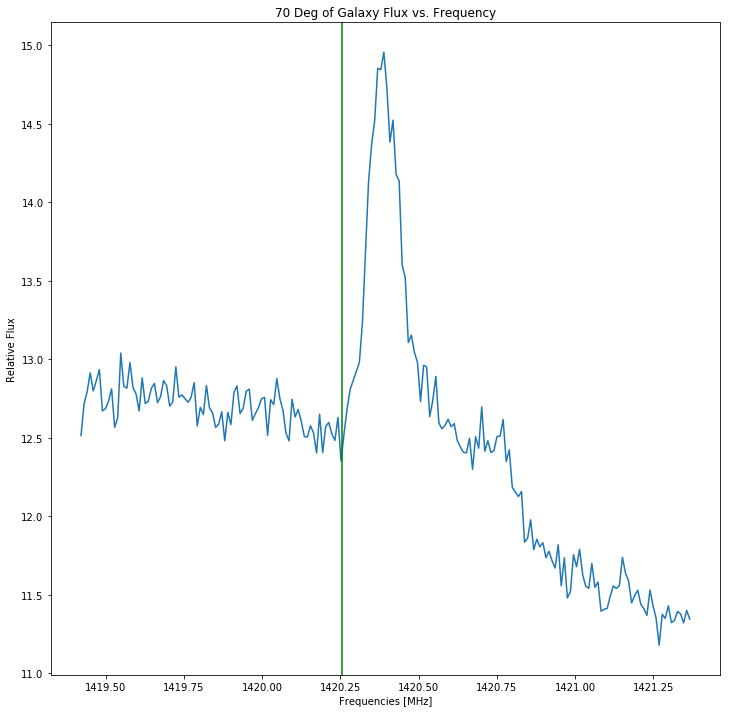

In [247]:
plt.plot(frequency[350:550],gal_spectra[7][350:550])
h170 = 1420.255
plt.axvline(h170,color='g')
plt.xlabel("Frequencies [MHz]")
plt.ylabel("Relative Flux")
plt.title("70 Deg of Galaxy Flux vs. Frequency")

Text(0.5, 1.0, '80 Deg of Galaxy Flux vs. Frequency')

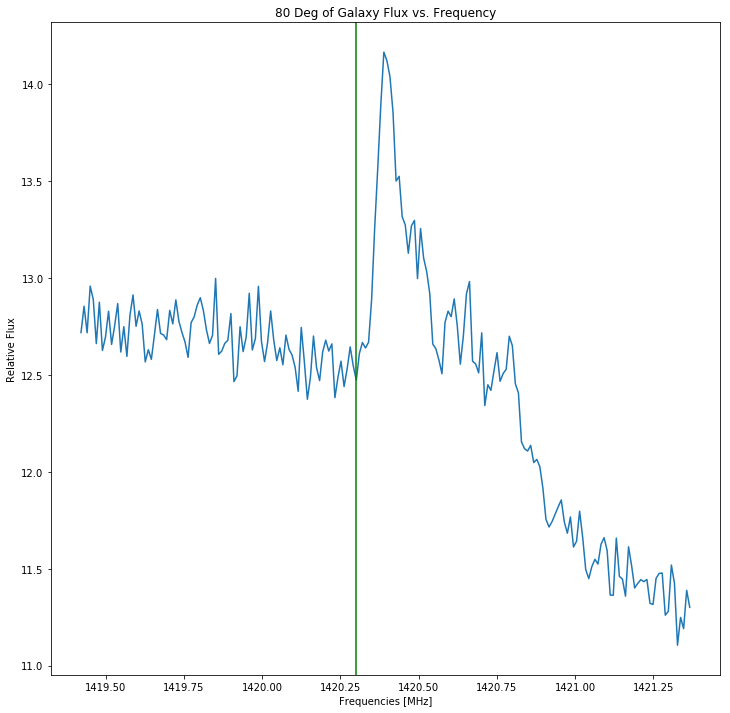

In [248]:
plt.plot(frequency[350:550],gal_spectra[8][350:550])
h180 = 1420.3
plt.axvline(h180,color='g')
plt.xlabel("Frequencies [MHz]")
plt.ylabel("Relative Flux")
plt.title("80 Deg of Galaxy Flux vs. Frequency")

Text(0.5, 1.0, '90 Deg of Galaxy Flux vs. Frequency')

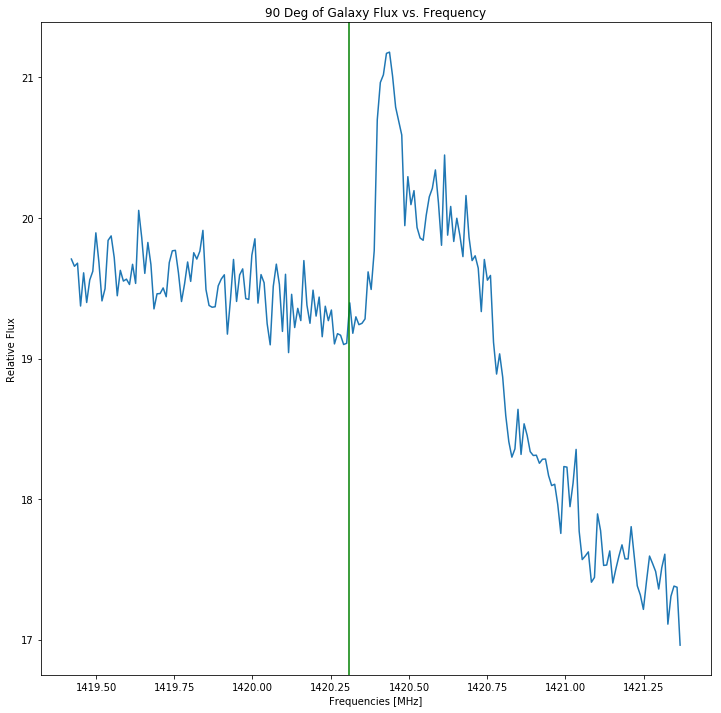

In [249]:
plt.plot(frequency[350:550],gal_spectra[9][350:550])
h190 = 1420.31
plt.axvline(h190,color='g')
plt.xlabel("Frequencies [MHz]")
plt.ylabel("Relative Flux")
plt.title("90 Deg of Galaxy Flux vs. Frequency")

In [250]:
h1act = 1420.4057
h1lines = np.array([h100,h110,h120,h130,h140,h150,h160,h170,h180,h190])
vels = np.zeros(len(h1lines))
c = 299792.458
for i in range(len(h1lines)):
    vels[i] = c*(1-(h1lines[i]/h1act))

Text(0.5, 1.0, 'Uncorrected Velocities vs. Frequencies')

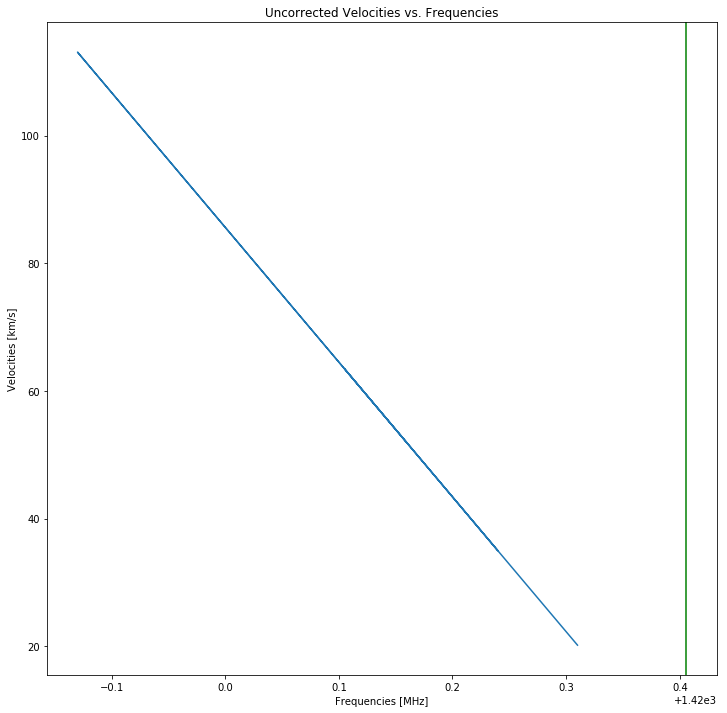

In [251]:
plt.plot(h1lines,vels)
plt.axvline(h1act,color='g')
plt.xlabel("Frequencies [MHz]")
plt.ylabel("Velocities [km/s]")
plt.title("Uncorrected Velocities vs. Frequencies")

In [252]:
deg = np.array([0,10,20,30,40,50,60,70,80,90])
radian = np.zeros(len(deg))
radii = np.zeros(len(deg))
radnot = 8.34
for i in range(len(deg)):
    radian[i] = deg[i]*np.pi/180
    radii[i] = radnot*np.sin(radian[i])

Text(0.5, 1.0, 'Uncorrected Velocities vs. Radii')

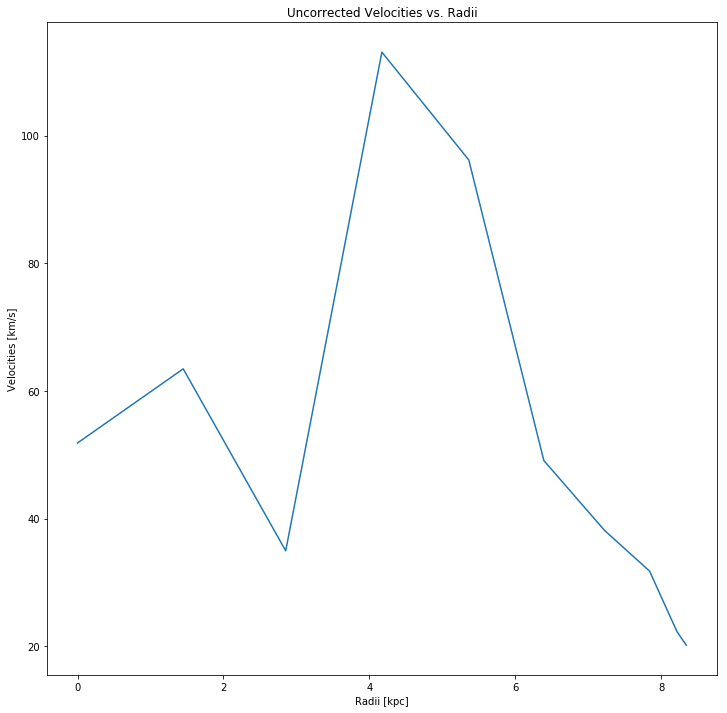

In [253]:
plt.plot(radii,vels)
plt.xlabel("Radii [kpc]")
plt.ylabel("Velocities [km/s]")
plt.title("Uncorrected Velocities vs. Radii")

[ 41.37772412  53.60608727  26.01283226 105.29545711  89.85056525
  44.41392919  35.20874949  30.73691504  23.12916337  22.87855189]


Text(0.5, 1.0, 'VSLR Velocities vs. Radii')

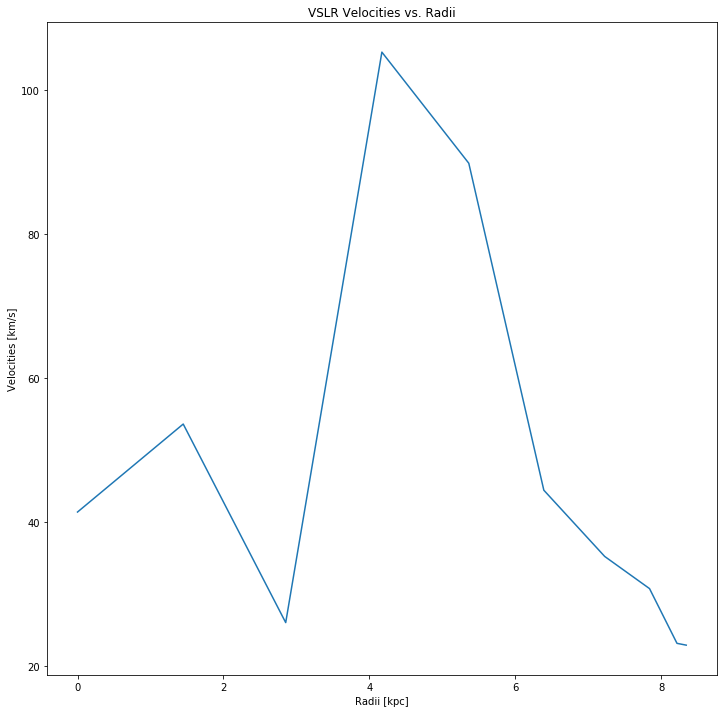

In [257]:
vslr = np.array([10.48,9.86,8.96,7.77,6.33,4.70,2.93,1.07,-0.82,-2.68])
vslrvels = vels-vslr
print(vslrvels)
plt.plot(radii,vslrvels)
plt.xlabel("Radii [kpc]")
plt.ylabel("Velocities [km/s]")
plt.title("VSLR Velocities vs. Radii")

In [258]:
velnot = 255.2
error = 5.1
vmax = np.zeros(len(radian))
errors = np.zeros(len(radian))
for i in range(len(radian)):
    vmax[i] = velnot*np.sin(radian[i])
    errors[i] = error*np.sin(radian[i])

[ 41.37772412  97.92110221 113.29637284 232.89545711 253.88996324
 239.90847108 256.21843253 270.54647186 274.45210194 278.07855189]


Text(0.5, 1.0, 'Final Corrected Velocities vs. Radii')

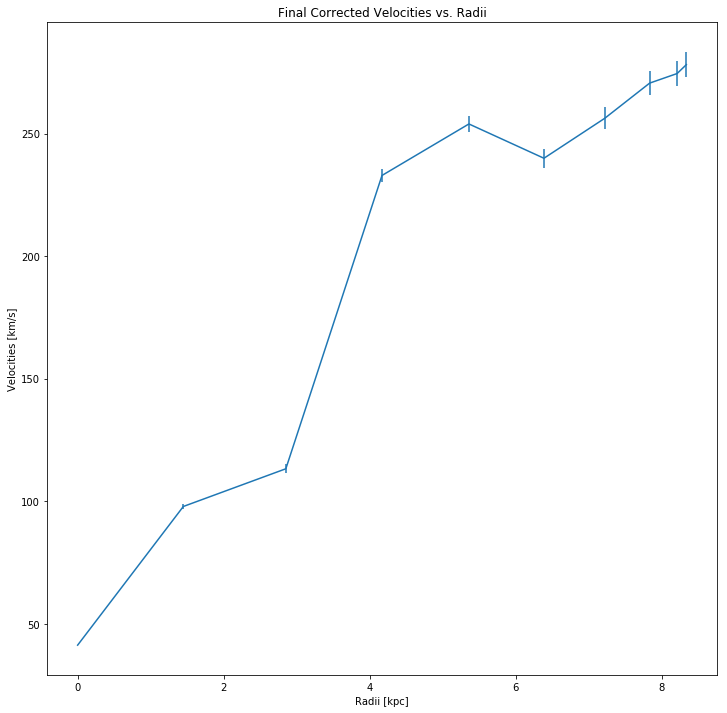

In [259]:
corvels = vslrvels+vmax
print(corvels)
plt.errorbar(radii,corvels,errors)
plt.xlabel("Radii [kpc]")
plt.ylabel("Velocities [km/s]")
plt.title("Final Corrected Velocities vs. Radii")